- Dataset: Tập dữ liệu lỗi phần mềm https://www.kaggle.com/datasets/semustafacevik/software-defect-prediction

- Demo trên Streamlit.

# INTRODUCTION

- LÝ DO CHỌN ĐỀ TÀI
    - Đảm bảo chất lượng và độ tin cậy phần mềm là ưu tiên hàng đầu trong kỷ nguyên kỹ thuật số
    - Học Máy, đặc biệt là Máy Vector Hỗ trợ (Support Vector Machine - SVM), giúp phát hiện và phân loại lỗi phần mềm nhanh chóng và chính xác. 

- MỤC TIÊU 

    - Nắm vững cơ sở lý thuyết SVM 
    - Đề xuất mô hình SVM tối ưu, có khả năng phân biệt mã nguồn chứa lỗi và không chứa lỗi.
    - Phân tích và Đánh giá Hiệu suất
    - Ứng dụng thực tiễn


# ***0. Import Data and Data Visualization***

### Dataset Information

- **Tên dữ liệu:** JM1
- **Nguồn dữ liệu:** NASA Metrics Data Program
- **Thông tin dữ liệu:** Tập dữ liệu bao gồm 22 đặc trưng định lượng và định tính, được trích xuất từ mã nguồn phần mềm viết bằng ngôn ngữ C. Các đặc trưng bao gồm các chỉ số McCabe và Halstead, và thông tin về lỗi phần mềm.
- **Biến phân loại:** Tập dữ liệu chứa hai loại biến phân loại:
  - Bình Thường (Normal): Các mẫu không chứa lỗi phần mềm.
  - Có Lỗi (Defective): Các mẫu chứa lỗi phần mềm.
- **Số lượng mẫu:** 10,885 mẫu
- **Phân phối lớp:** 
  - Không lỗi: 2,106 (19.35%)
  - Có lỗi: 8,779 (80.65%)

Mô tả Dữ Liệu:
- Dữ liệu này mô tả một tập hợp các đặc trưng và kết quả dự đoán lỗi phần mềm từ chương trình JM1, được viết bằng ngôn ngữ lập trình C và là một hệ thống dự đoán thời gian thực dựa trên mô phỏng để tạo ra dự đoán. Dữ liệu được thu thập từ các công cụ trích xuất đặc trưng McCabe và Halstead của mã nguồn, những công cụ này được định nghĩa vào những năm 70 nhằm mục đích mô tả khách quan các đặc trưng của mã nguồn liên quan đến chất lượng phần mềm. Tuy nhiên, mối liên hệ giữa các đặc trưng này với chất lượng phần mềm vẫn còn là đề tài tranh luận.

- Tập dữ liệu bao gồm 21 cột với các đặc trưng như số lượng dòng code (LOC), số lượng các toán tử và toán hạng duy nhất, tổng số lần xuất hiện của toán tử và toán hạng, số lượng các rẽ nhánh, và một cột chỉ ra liệu có lỗi hay không. Tất cả các cột đều không có giá trị null với tổng số 10,885 mẫu.

- Nghiên cứu trước đây sử dụng tập dữ liệu này đã chỉ ra rằng các phương pháp học máy đơn giản như ROCKY có thể đạt được hiệu suất tương đương với các phương pháp phức tạp hơn như J48 trong việc dự đoán lỗi. Nó cũng chỉ ra rằng độ chính xác không phải là một thước đo thông tin đầy đủ cho hiệu suất của bộ dò lỗi.

- Tập dữ liệu này cung cấp một nguồn dữ liệu quan trọng cho việc nghiên cứu và phát triển các mô hình dự đoán lỗi phần mềm, đồng thời góp phần vào việc hiểu rõ hơn về ảnh hưởng của các đặc trưng mã nguồn đối với chất lượng phần mềm.

In [17]:
# Import Thư Viện

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate


In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# Import data (dùng thư viện pandas)

import pandas as pd
df = pd.read_csv("jm1.csv")



In [20]:
df.head()  # In 5 dòng đầu tiên của dữ liệu

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [21]:
df.info() # In ngắn gọn tổng quan bộ dữ liệu (Dataframe)
# 22 cột, 21 cột features, 1 cột cuối 'defects': có bị tấn công hay không.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

Giải thích ngắn gọn 21 cột đặc trưng trong bộ dữ liệu về dự đoán lỗi phần mềm JM1:

1. **loc (Lines of Code)**: Số lượng dòng code, một chỉ số đo lường kích thước của chương trình.

2. **v(g) (McCabe's cyclomatic complexity)**: Độ phức tạp vòng lặp của McCabe, đo lường độ phức tạp của chương trình dựa trên quyết định điều khiển luồng.

3. **ev(g) (Essential complexity)**: Độ phức tạp thiết yếu, phần của độ phức tạp vòng lặp không thể giảm bởi việc tái cấu trúc chương trình.

4. **iv(g) (Design complexity)**: Độ phức tạp thiết kế, đo lường số lượng các đường dẫn độc lập thông qua mã nguồn.

5. **n (Halstead's total operators + operands)**: Tổng số toán tử và toán hạng, đo lường sự phức tạp thông qua cú pháp của chương trình.

6. **v (Halstead's Volume)**: Thể tích Halstead, đo lường kích thước của chương trình dựa trên số lượng toán tử và toán hạng.

7. **l (Halstead's Program Length)**: Chiều dài chương trình Halstead, một chỉ số khác đo lường kích thước của chương trình.

8. **d (Halstead's Difficulty)**: Độ khó Halstead, đo lường mức độ khó để hiểu và duy trì chương trình.

9. **i (Halstead's Intelligence)**: Trí thông minh Halstead, đo lường khả năng "trí thông minh" của chương trình dựa trên sự cân nhắc giữa độ khó và thể tích.

10. **e (Halstead's Effort)**: Công sức Halstead, đo lường công sức cần thiết để viết hoặc hiểu chương trình.

11. **b (Halstead's Delivered Bugs)**: Số lỗi dự kiến giao từ chương trình, dự đoán số lượng lỗi dựa trên thể tích Halstead.

12. **t (Halstead's Time to understand)**: Thời gian cần thiết để hiểu chương trình, tính bằng công sức chia cho một hằng số tốc độ.

13. **lOCode (Lines Of Code without comments)**: Số dòng code không bao gồm bình luận.

14. **lOComment (Lines Of Comments)**: Số dòng bình luận trong code.

15. **lOBlank (Blank lines)**: Số dòng trống trong code.

16. **locCodeAndComment (Lines of Code and Comment)**: Số dòng kết hợp giữa code và bình luận.

17. **uniq_Op (Unique Operators)**: Số lượng toán tử duy nhất trong chương trình.

18. **uniq_Opnd (Unique Operands)**: Số lượng toán hạng duy nhất trong chương trình.

19. **total_Op (Total Operators)**: Tổng số lần xuất hiện của các toán tử trong chương trình.

20. **total_Opnd (Total Operands)**: Tổng số lần xuất hiện của các toán hạng trong chương trình.

21. **branchCount (Branch Count)**: Số lượng các nhánh trong chương trình, thường liên quan đến độ phức tạp vòng lặp của McCabe.

22. **defects (Defects)**: Một biến boolean chỉ ra liệu mô-đun có lỗi hay không, dùng để ghi lại kết quả dự đoán lỗi. **văn bản in đậm**

Các đặc trưng này đều liên quan đến các khía cạnh của chất lượng phần mềm, bao gồm kích thước, độ phức tạp, và khả năng bảo trì, giúp dự đoán khả năng xuất hiện lỗi trong phần mềm.

In [22]:
# train_df.describe()
df.describe() # Các chỉ số xác suất thống kê của tập data.

# 1. **count**: Số lượng giá trị không phải NaN trong mỗi cột.
# 2. **mean**: Giá trị trung bình của mỗi cột.
# 3. **std**: Độ lệch chuẩn, thể hiện sự phân tán của dữ liệu so với giá trị trung bình.
# 4. **min**: Giá trị nhỏ nhất trong mỗi cột.
# 5. **25%**: Phân vị thứ 25, còn được gọi là phân vị thứ nhất hoặc tứ phân vị dưới, nơi 25% giá trị nằm dưới giá trị này.
# 6. **50%**: Phân vị thứ 50 hoặc giá trị trung vị, nơi có 50% giá trị nằm dưới và 50% nằm trên giá trị này.
# 7. **75%**: Phân vị thứ 75, còn gọi là phân vị thứ ba hoặc tứ phân vị trên, nơi 75% giá trị nằm dưới giá trị này.
# 8. **max**: Giá trị lớn nhất trong mỗi cột.


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


# ***1. Data Processing:***
1.1 Xử lý dữ liệu dạng null (rỗng) và dữ liệu dạng chuỗi.

a. Xử lý Null

b. Xử lý dữ liệu dạng chuỗi:
  Mã hóa: Các cột dạng object như `protocol_type`, `service`, và `flag` nên được mã hóa thành dữ liệu số, bằng cách sử dụng LabelEncoder hoặc OneHotEncoder từ sklearn.preprocessing.
  - `pd.to_numeric`:  chuyển đổi dữ liệu cột chứa số nhưng được định dạng là chuỗi thành số. (errors='coerce') (nếu không thể, nó sẽ trả về NaN).
  - `LabelEncoder` gán mỗi danh mục một số nguyên. Ví dụ, `['red', 'blue', 'green']` có thể được chuyển đổi thành `[0, 1, 2]`.
  - `OneHotEncoder` biến danh mục thành vector nhị phân, tránh thiên vị số nguyên. Ví dụ, `['red', 'blue', 'green']` có thể được chuyển đổi thành `[1, 0, 0], [0, 1, 0], [0, 0, 1]`.

1.2 Simple Feature Selection: Kiểm tra xem có cột nào mà giá trị trong cột giống nhau hoàn toàn ko?

## 1.1 Xử lý dữ liệu dạng null và dữ liệu dạng chuỗi.


In [23]:
df.isnull().sum() # Đếm số lượng giá trị null trong mỗi cột của DataFrame

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [24]:
df.describe(include='object') # Thông tin về các cột có dữ liệu kiểu 'object' (ĐỐI TƯỢNG)

# count: số hàng. Mỗi cột này có tổng cộng 10,885 giá trị.
# unique: số lượng giá trị duy nhất mà cột đó chứa.
# top:là giá trị xuất hiện nhiều nhất trong mỗi cột,
# freq: là tần suất xuất hiện của giá trị top đó.

,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10885,10885,10885,10885,10885
unique,69,172,582,469,147
top,0,0,0,0,1
freq,1332,1368,1332,1368,2636


In [25]:
# Xem 5 dòng đầu tiên từ 5 cột,
#  CHECK XEM DỮ LIỆU CHỨA TRONG 5 CỘT LÀ GÌ.
print(df[['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']].head())

  uniq_Op uniq_Opnd total_Op total_Opnd branchCount
0     1.2       1.2      1.2        1.2         1.4
1       1         1        1          1           1
2      17        36      112         86          13
3      17       135      329        271           5
4      11        16       76         50           7


In [26]:
# Chuyển kiểu dữ liệu object sang dạng số
# với tham số errors='coerce' có nghĩa là bất kỳ giá trị nào không thể chuyển đổi thành số sẽ được thay thế bằng NaN (đại diện cho "Not a Number").
df['uniq_Op'] = pd.to_numeric(df['uniq_Op'], errors='coerce')
df['uniq_Opnd'] = pd.to_numeric(df['uniq_Opnd'], errors='coerce')
df['total_Op'] = pd.to_numeric(df['total_Op'], errors='coerce')
df['total_Opnd'] = pd.to_numeric(df['total_Opnd'], errors='coerce')
df['branchCount'] = pd.to_numeric(df['branchCount'], errors='coerce')

# Đếm xem có giá trị bị lỗi NaN trong lúc chuyển to_numeric không?
df.isnull().sum() # Đếm số lượng giá trị null trong mỗi cột của DataFrame


loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

- Ở trên ta sử dụng hàm `pd.to_numeric` với tham số `errors='coerce'`, pandas sẽ chuyển đổi tất cả các giá trị của cột đó thành số. Nếu pandas gặp một giá trị nào đó không thể chuyển đổi được (ví dụ: một chuỗi ký tự không phải số), thay vì trả về lỗi, nó sẽ "ép buộc" giá trị đó thành `NaN`.

=>
Ban đầu không thấy `NaN` nhưng sau khi chuyển đổi lại xuất hiện `NaN`, có thể vì 1 vài lý do: Dữ liệu không rõ ràng, Dữ liệu định dạng sai, ...


In [27]:

# Loại bỏ các hàng có giá trị NaN sau khi chuyển đổi
df = df.dropna()  # drop NaN


In [28]:
df  # Hiển thị ra df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10.0,15.0,30.0,22.0,7.0,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12.0,8.0,19.0,11.0,3.0,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18.0,15.0,59.0,44.0,7.0,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9.0,8.0,21.0,15.0,1.0,False


## 1.2 Feature Selection (Lựa chọn đặc trưng):
1. Kiểm tra xem có cột nào mà giá trị trong cột giống nhau hoàn toàn ko?
- Nếu mà có cột nào đó có CÁC GIÁ TRỊ TRONG CỘT HOÀN TOÀN GIỐNG NHAU THÌ MÌNH LOẠI BỎ CỘT ĐÓ LUÔN.

In [29]:
# 1. Kiểm tra xem có cột nào mà giá trị trong cột giống nhau hoàn toàn ko?
# Nếu có thì nó in ra, còn ko thì không in.
def check(df):
    for col in df.columns: # for col in ['protocol_type', 'service', 'flag']:
        # print(f"Col {col} có", len(df[col].value_counts()), "giá trị phân biệt")
        if df[col].nunique() == 1:
            print(f"Col {col} HAVE:", len(df[col].value_counts()), "giá trị phân biệt", "=> Tất cả dữ liệu trong cột này giống nhau. Có thể loại bỏ cột.")
        # else:
        #     print(f"Col {col} HAVE", len(df[col].value_counts()), "giá trị phân biệt", "=> Không nên loại bỏ cột.")

check(df)




## 1.3. Xem Class Distribution
Xem phân phối của các phân lớp của data (class distribution).
- Tức là XEM TỈ LỆ của TRUE với FALSE.

Class distribution Training set:
defects
False    8777
True     2103
Name: count, dtype: int64
defects
False    0.80671
True     0.19329
Name: proportion, dtype: float64


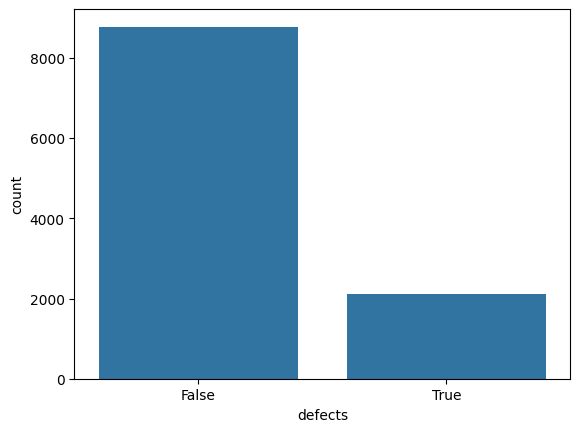

In [30]:
# # Xem phân phối của các lớp trong tập huấn luyện (class distribution)
# # xác định xem dữ liệu có bị lệch (imbalanced) hay không, -> Liên quan đến cách chọn mô hình và áp dụng các kỹ thuật cân bằng dữ liệu.

print('Class distribution Training set:')
print(df['defects'].value_counts()) # value_counts: số lượng mỗi giá trị, False    8777   True     2103


import seaborn as sns # Import thư viện Seaborn để vẽ biểu đồ
# Sẽ tạo một biểu đồ cột, mỗi cột biểu diễn số lượng mẫu thuộc về một lớp (hoặc nhóm) cụ thể.
sns.countplot(x=df['defects']) # sns.countplot() sử dụng để vẽ biểu đồ đếm số lượng (count plot).

print(df['defects'].value_counts(normalize=True))

Dữ liệu classification cho thấy có ***sự mất cân bằng lớp*** (class imbalance):
- có nhiều mẫu "False" hơn so với mẫu "True".
=> Điều này có thể ảnh hưởng đến hiệu suất của mô hình học máy, vì mô hình có thể thiên vị về lớp đa số và không thể học hiệu quả từ lớp thiểu số.



Một số phương pháp tiền xử lý dữ liệu để xử lý dữ liệu mất cân bằng:

1. **Chỉnh Sửa Lớp (Resampling)**
   - **Oversampling lớp thiểu số**: Tăng số lượng mẫu trong lớp thiểu số bằng cách tái sử dụng mẫu hoặc tạo mẫu tổng hợp (ví dụ: sử dụng SMOTE).
   - **Undersampling lớp đa số**: Giảm số lượng mẫu trong lớp đa số để số lượng mẫu trở nên cân bằng hơn.
   
2. **Sửa đổi Trọng số của Lớp (Class Weight Adjustment)**
   - Khi huấn luyện mô hình, cung cấp trọng số khác nhau cho các lớp để bù đắp cho sự mất cân bằng. Có thể sử dụng các thuật toán có hỗ trợ việc điều chỉnh trọng số nội tại như Logistic Regression, SVM,...

3. **Sử dụng Mô Hình Đặc Biệt Cho Dữ liệu Mất Cân Bằng**
   - Các thuật toán như "Random Forest" có thể xử lý tốt dữ liệu mất cân bằng mà không cần tiền xử lý quá nhiều.

4. **Đánh Giá Mô Hình Cẩn Thận**
   - Sử dụng các metric đánh giá thích hợp như F1-score, Precision, và biệt là Recall, ROC AUC, thay vì chỉ dựa vào accuracy.
    - ROC AUC: Tính diện tích dưới đường cong ROC (Receiver Operating Characteristic) là một cách tốt để đánh giá mô hình khi tất cả các lớp đều quan trọng như nhau, và không quan tâm nhiều đến mức độ mất cân bằng giữa chúng.

    - Precision-Recall AUC: Đây là một chỉ số quan trọng trong trường hợp lớp thiểu số là lớp quan trọng và bạn muốn đảm bảo rằng mô hình không chỉ đơn giản là dự đoán lớp đa số.



5. **Sử dụng Kỹ Thuật Ensemble**
   - Sử dụng kỹ thuật như Bagging và Boosting thường cải thiện hiệu suất trên tập dữ liệu mất cân bằng bằng cách kết hợp nhiều mô hình học máy.





Trong đề tài được giao, thì em sử dụng SMOTE để tăng số lượng mẫu trong lớp thiểu số bằng cách tái sử dụng mẫu hoặc tạo mẫu tổng hợp (em sẽ trình bày chi tiết hơn ở phần dưới).

# ***2. Split Train - Val dataset***
- Chia dataset thành tập train và tập valid để đánh giá mô hình.


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(['defects'], axis=1)  # # Loại bỏ (drop) cột 'class' để lấy features', f(X) = y, X LÀ 21 CỘT BÊN TRÊN.
y = df['defects'] # Target variable: biến mục tiêu (y là cột cuối)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm định
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# stratify=y: Đảm bảo rằng tỉ lệ các lớp (classes) trong tập y được giữ nguyên trong cả tập train và tập test. Điều này quan trọng khi dữ liệu của bạn không cân bằng (có nhiều lớp với số lượng mẫu khác nhau).
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

from collections import Counter
print("Trước SMOTE: ", Counter(y_train)) # cảm giác có startify với không có thì nó vẫn khá cân bằng

# TẬP TRAIN dùng để đào tạo mô hình, TẬP TEST để đánh giá, đo lường hiệu suất model

Trước SMOTE:  Counter({False: 7022, True: 1682})


In [32]:
# Có thể chuẩn hóa Data hoặc không
# Chuẩn hóa dữ liệu: chỉ có đầu vào (features) cần được chuẩn hóa; đầu ra (target) không cần phải chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Đảm bảo rằng dữ liệu mới không bị rò rỉ thông tin vào quá trình chuẩn hóa
                        # (ví dụ, không sử dụng fit_transform() trên dữ liệu mới, chỉ sử dụng transform()).


# ***3. Huấn luyện Mô hình:***


Why chọn SVM

1. Hiệu suất cao: Tạo mặt phẳng phân cách với biên lớn nhất, giảm sai số phân loại.

2. Xử lý dữ liệu nhiều chiều: Phù hợp với tập dữ liệu nhiều đặc trưng.

3. Khả năng tổng quát hóa: Hiệu quả trên dữ liệu chưa thấy trước đó, giảm overfitting.

4. Kernel trick: Biến đổi dữ liệu phi tuyến tính thành tuyến tính, phân loại hiệu quả.


Cơ sở lý thuyết

1. SVM tìm ra mặt phẳng quyết định tốt nhất để phân chia dữ liệu thành các lớp khác nhau.
2. Hàm mất mát hinge, `𝐿(𝑦, 𝑓) = 𝑚𝑎𝑥(0, 1 – 𝑦 ∗ 𝑓(𝑥))`, để tối ưu hóa biên phân cách và giảm thiểu các phân lớp sai. 
3. SVM có khả năng làm việc với không gian đặc trưng nhiều chiều và hiệu quả với dữ liệu có chiều cao mà không cần lớn về số lượng.


https://viblo.asia/p/support-vector-machine-trong-hoc-may-mot-cai-nhin-don-gian-hon-XQZkxoQmewA

 Tổng Quan về Support Vector Machines (SVM)

Support Vector Machines (SVM) là một thuật toán học máy giám sát, sử dụng cho cả phân loại và hồi quy, nhưng chủ yếu được áp dụng trong các bài toán phân loại. SVM hoạt động bằng cách tìm kiếm siêu phẳng (hyperplane) tốt nhất để phân chia dữ liệu thành các lớp khác nhau. Trong không gian n chiều (với n là số lượng các tính năng), mỗi điểm dữ liệu là một vector trong không gian này và siêu phẳng là đường hoặc mặt phẳng phân chia dữ liệu thành các lớp khác nhau. Mục tiêu chính của SVM là tối ưu hóa biên phân cách và giảm thiểu các lỗi phân lớp thông qua việc sử dụng hàm mất mát hinge, \( L(y, f) = \max(0, 1 - y \cdot f(x)) \).

 Các Thành Phần Chính của SVM

1. **Support Vectors:**
   - **Định nghĩa:** Support vectors là các điểm dữ liệu gần với siêu phẳng nhất và ảnh hưởng trực tiếp đến vị trí và định hướng của siêu phẳng.
   - **Vai trò:** Đây là các điểm quan trọng nhất trong việc xác định biên phân cách tối ưu. Nếu di chuyển các support vectors thì siêu phẳng cũng sẽ thay đổi.

2. **Hyperplane:**
   - **Định nghĩa:** Siêu phẳng trong không gian nhiều chiều là một đường (với không gian 2 chiều) hoặc một mặt phẳng (với không gian 3 chiều), và nói chung là một không gian con với chiều thấp hơn không gian dữ liệu gốc.
   - **Cách xác định:** Siêu phẳng được xác định sao cho khoảng cách từ nó đến các support vectors là lớn nhất, tức là tối đa hóa margin, từ đó thu được một siêu phẳng tạo khoảng cách xa nhất giữa các lớp. Nhờ vậy, SVM có thể giảm thiểu việc phân lớp sai (misclassification) đối với điểm dữ liệu mới đưa vào.
   
   - **Cách tính margin:** 
     - Margin được tính bằng khoảng cách vuông góc từ siêu phẳng đến các support vectors. Công thức tính margin thường dựa trên các tham số của siêu phẳng, chẳng hạn như vector trọng số \( \mathbf{w} \) và bias \( b \).
     - Khi margin lớn, siêu phẳng phân chia các lớp một cách rõ ràng và có khả năng phân loại tốt các điểm dữ liệu mới mà mô hình chưa từng thấy. Điều này giúp mô hình tổng quát hóa tốt hơn, giảm thiểu lỗi trên các dữ liệu kiểm tra (test data).
     
   - **Phương trình của siêu phẳng:**
     - Trong không gian \( n \) chiều, siêu phẳng có thể được mô tả bằng phương trình \( \mathbf{w} \cdot \mathbf{x} + b = 0 \), trong đó \( \mathbf{w} \) là vector trọng số và \( b \) là bias.
     - Các support vectors nằm trên hai đường song song với siêu phẳng chính, và phương trình của chúng là \( \mathbf{w} \cdot \mathbf{x} + b = \pm 1 \). Khoảng cách giữa hai đường này chính là \( \frac{2}{\|\mathbf{w}\|} \).

   - **Quá trình huấn luyện SVM:**
     - Quá trình huấn luyện SVM tìm ra vector trọng số \( \mathbf{w} \) và bias \( b \) để tối đa hóa margin. Bài toán này thường được giải bằng cách sử dụng kỹ thuật tối ưu hóa, chẳng hạn như phương pháp Lagrange.
n loại và hồi quy.

 Phương Pháp Làm Việc của SVM

1. **Xác định Siêu Phẳng Đúng (Kịch Bản 1)**:
   - Trong một không gian dữ liệu, có nhiều khả năng cho các siêu phẳng khác nhau. Ví dụ, với ba siêu phẳng A, B, và C, quy tắc đầu tiên để chọn siêu phẳng là chọn siêu phẳng phân chia hai lớp tốt nhất. Trong trường hợp này, siêu phẳng B là lựa chọn chính xác nhất.

2. **Xác định Siêu Phẳng Đúng (Kịch Bản 2)**:
   - Khi có nhiều siêu phẳng đều thỏa mãn quy tắc đầu tiên, ta áp dụng quy tắc thứ hai: chọn siêu phẳng có margin lớn nhất. Margin là khoảng cách từ điểm gần nhất của một lớp đến siêu phẳng. Trong ví dụ này, siêu phẳng C có margin lớn nhất và do đó là lựa chọn đúng.

3. **Xác định Siêu Phẳng Đúng (Kịch Bản 3)**:
   - Trong các trường hợp phức tạp hơn, việc lựa chọn siêu phẳng có thể dựa trên cả hai quy tắc. Nếu một siêu phẳng có margin lớn hơn nhưng không phân chia các lớp thành riêng biệt, thì nó không được chọn. Thay vào đó, siêu phẳng A là lựa chọn chính xác vì nó phân chia các lớp tốt nhất mặc dù có margin thấp hơn.

 Giải Quyết Các Trường Hợp Không Thể Tách Tuyến Tính

Trong một số trường hợp, dữ liệu không thể được phân chia rõ ràng bằng một siêu phẳng tuyến tính trong không gian gốc. SVM giải quyết vấn đề này bằng cách áp dụng kỹ thuật kernel (kernel trick). Kỹ thuật kernel cho phép SVM làm việc với các không gian có chiều cao hơn bằng cách thêm các tính năng mới hoặc biến đổi dữ liệu ban đầu. Ví dụ, bằng cách thêm một tính năng mới \( z = x^2 + y^2 \), SVM có thể tìm một siêu phẳng trong không gian mới (z, x) để phân chia dữ liệu thành các lớp riêng biệt.

Kỹ thuật kernel giúp SVM xử lý các bài toán phân loại không tuyến tính mà không cần phải thêm các tính năng bằng tay. Các kernel phổ biến bao gồm:

- **Polynomial Kernel**: Cho phép SVM phân chia dữ liệu bằng một đa thức.
- **Gaussian (RBF) Kernel**: Sử dụng hàm Gaussian để phân chia dữ liệu không tuyến tính.
- **Sigmoid Kernel**: Áp dụng hàm sigmoid cho phân loại.

SVM có khả năng làm việc hiệu quả với dữ liệu có chiều cao mà không cần lớn về số lượng, giúp nó trở thành một công cụ mạnh mẽ trong các bài toán học máy phức tạp.


![](https://images.viblo.asia/0c68ae55-af5c-4a1a-a609-a19eb5a85459.PNG)

## 3.0 Bắt đầu với basic SVM và EVALUATION METRICS

In [33]:
# Train with basic model
from sklearn.svm import SVC # train
from sklearn.metrics import accuracy_score, classification_report # đánh giá model

# Khởi tạo basic model
basic_model = SVC(kernel='linear') # svm MODEL

# Huấn luyện mô hình trên tập dữ liệu đã được chuẩn hóa
basic_model.fit(X_train_scaled, y_train)  # fit nó với dữ liệu train

# Đánh giá mô hình trên tập dữ liệu kiểm định đã được chuẩn hóa
y_pred = basic_model.predict(X_test_scaled)  # Dùng X_val_scaled chứ không phải X_val
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy", accuracy) # Độ chính xác của model (Precision - độ chính xác).
print(report)


Accuracy 0.8092830882352942
              precision    recall  f1-score   support

       False       0.81      1.00      0.89      1755
        True       0.71      0.02      0.05       421

    accuracy                           0.81      2176
   macro avg       0.76      0.51      0.47      2176
weighted avg       0.79      0.81      0.73      2176



Các metric trong đánh giá model: https://www.miai.vn/2020/06/16/oanh-gia-model-ai-theo-cach-mi-an-lien-chuong-2-precision-recall-va-f-score/


Dựa trên report sau quá trình training, kết quả của mô hình basic SVM cho thấy có một sự chênh lệch lớn giữa hiệu suất phân loại của hai lớp:


- Hiệu suất của lớp "False":

Precision và Recall rất cao (0.81 và 1.00), dẫn đến F1-score cao (0.89). Điều này cho thấy mô hình rất tốt trong việc phân loại các mẫu không phải lỗi, tức là hầu hết các dự đoán của mô hình cho lớp "False" đều chính xác và không bỏ sót bất kỳ mẫu nào thuộc lớp này.

- Hiệu suất của lớp "True":

Ngược lại, Recall rất thấp (0.02) mặc dù Precision tương đối cao (0.71). Điều này dẫn đến F1-score rất thấp (0.05), cho thấy mô hình không phát hiện tốt các mẫu thuộc lớp lỗi, tức là mô hình hầu như bỏ qua việc phát hiện lỗi.

=> Mất cân bằng lớp: Nguyên nhân chính của hiện tượng này là do mất cân bằng lớp trong tập dữ liệu, nơi số lượng mẫu của lớp "False" chiếm ưu thế. Điều này làm cho mô hình có xu hướng thiên về lớp đa số và không "học" đủ thông tin từ lớp thiểu số.

- Đề xuất cải thiện:

- Tái cân bằng dữ liệu: Sử dụng các kỹ thuật tái cân bằng dữ liệu như oversampling (SMOTE) cho lớp thiểu số hoặc undersampling cho lớp đa số để giảm thiểu mất cân bằng.
- Điều chỉnh siêu tham số: Điều chỉnh siêu tham số của mô hình SVM hoặc thử nghiệm với các kernel khác nhau để cải thiện khả năng phân loại.
- - Sử dụng các kỹ thuật học máy nâng cao: Áp dụng các phương pháp học máy nâng cao như ensemble methods (Random Forest, XGBoost) có khả năng xử lý tốt hơn với dữ liệu mất cân bằng.(TRONG KHUÔN KHỔ ĐỀ TÀI CHÚNG TÔI CHƯA THỬ NGHIỆM CÁC PHƯƠNG PHÁP NÀY ĐƯỢC)

## 3.1 Sử dụng SMOTE để cân bằng số lượng mẫu giữa các lớp.
SMOTE là một kỹ thuật dùng để cân bằng tập dữ liệu phân loại bằng cách tạo mẫu dữ liệu giả cho lớp thiểu số. Nó tạo ra các mẫu mới bằng cách nội suy giữa các mẫu hiện có của lớp thiểu số. Điều này giúp mô hình học được mà không thiên vị về lớp đa số. Quan trọng là chỉ áp dụng SMOTE trên tập huấn luyện để tránh rò rỉ dữ liệu và đảm bảo mô hình phản ánh đúng thực tế khi kiểm thử.

In [34]:
# cài thư viện
!pip install imbalanced-learn


In [35]:
# load thư viện
from imblearn.over_sampling import SMOTE
from collections import Counter

# KIỂM TRA SỐ LƯỢNG DỮ LIỆU CỦA TẬP TRAIN VỚI TEST.
print("Number of examples in X_train dataset: ", X_train_scaled.shape)
print("Number of examples in y_train dataset: ", y_train.shape)
print("Number of examples in X_test dataset: ", X_test_scaled.shape)
print("Number of examples in y_test dataset: ", y_test.shape)

print("Trước SMOTE: ", Counter(y_train))

# Tạo đối tượng SMOTE và áp dụng nó trên tập dữ liệu
smote = SMOTE(random_state=42)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



# Quan trọng là chỉ áp dụng SMOTE trên tập huấn luyện
#  để tránh rò rỉ dữ liệu và đảm bảo mô hình phản ánh đúng thực tế khi kiểm thử.)

print("Sau SMOTE: (sau khi cân bằng dữ liệu) ", Counter(y_train_smote))

Number of examples in X_train dataset:  (8704, 21)
Number of examples in y_train dataset:  (8704,)
Number of examples in X_test dataset:  (2176, 21)
Number of examples in y_test dataset:  (2176,)
Trước SMOTE:  Counter({False: 7022, True: 1682})
Sau SMOTE: (sau khi cân bằng dữ liệu)  Counter({False: 7022, True: 7022})


In [36]:
from sklearn.metrics import f1_score

# Thay X_train_scaled, y_train bằng X_train_smote, y_train_smote

# Khởi tạo basic model
basic_model = SVC(kernel='linear', random_state=42) # cố định random_state để kết quả cố định sau mỗi lần chạy
# Huấn luyện mô hình trên tập dữ liệu đã được chuẩn hóa
basic_model.fit(X_train_scaled_smote, y_train_smote)  # Sử dụng y_train, không cần chuẩn hóa

# Đánh giá mô hình trên tập dữ liệu kiểm định đã được chuẩn hóa
y_pred = basic_model.predict(X_test_scaled)  # Dùng X_val_scaled chứ không phải X_val
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)  # tránh đặt tên biến trùng tên hàm
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}. F1 Score: {f_score}")
print(report)



Accuracy Score: 0.7490808823529411. F1 Score: 0.4312499999999999
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      1755
        True       0.38      0.49      0.43       421

    accuracy                           0.75      2176
   macro avg       0.63      0.65      0.64      2176
weighted avg       0.78      0.75      0.76      2176



Hiệu suất của lớp "True" đã được cải thiện đáng kể sau khi áp dụng SMOTE, đặc biệt là về recall. Mặc dù precision của lớp này đã giảm, nhưng recall đã tăng lên đáng kể từ 0.02 lên 0.49, dẫn đến F1-score cũng tăng lên.

Phân tích chi tiết
Accuracy:

Accuracy đã giảm từ 0.8093 xuống 0.7491. Điều này là do mô hình hiện tại đã cân bằng hơn trong việc phát hiện các mẫu thuộc lớp thiểu số ("True"), điều này làm cho tổng số dự đoán chính xác giảm đi khi so với mô hình trước đó.
Precision và Recall:

Lớp "False": Precision giảm nhẹ từ 0.81 xuống 0.87, và recall từ 1.00 xuống 0.81, cho thấy mô hình đang chấp nhận một số sai lầm để cải thiện khả năng phát hiện lỗi.
Lớp "True": Precision giảm từ 0.71 xuống 0.38, nhưng recall đã tăng đáng kể từ 0.02 lên 0.49, cho thấy mô hình hiện tại đã phát hiện được nhiều lỗi hơn, mặc dù một số dự đoán không chính xác.
F1-Score:

Lớp "False": F1-score giảm nhẹ từ 0.89 xuống 0.84.
Lớp "True": F1-score tăng từ 0.05 lên 0.43, một cải thiện đáng kể cho lớp thiểu số.
Macro và Weighted Averages:

Macro avg: Cải thiện về sự cân bằng giữa precision và recall giữa hai lớp, tăng từ 0.47 lên 0.64.
Weighted avg: Giảm nhẹ từ 0.73 xuống 0.76, phản ánh sự cân bằng tốt hơn trong phân loại các lớp.

Kết luận
Sau khi áp dụng SMOTE, mô hình SVM đã có sự cải thiện đáng kể trong việc phát hiện các lỗi phần mềm (lớp "True"). Mặc dù có sự giảm nhẹ về độ chính xác tổng thể (accuracy), nhưng khả năng phát hiện lỗi của mô hình đã tăng lên, điều này là mục tiêu chính khi đối mặt với dữ liệu mất cân bằng. Kỹ thuật SMOTE đã giúp mô hình học được nhiều hơn từ các mẫu thiểu số, cải thiện recall và F1-score cho lớp lỗi.

## **3.2 (TIẾP THEO SMOTE) Feature Selection with RFE và TUNING điều chỉnh siêu tham số để tăng hiệu suất Model**
- With X_train -> X_train_scaled -> `X_train_scaled_smote`, X_test -> `X_test_scaled`,
y_train -> `y_train_smote`, `y_test` (Scaled cho X, còn y không. và Smote chỉ dùng cho tập train)
- Runing Model
  - Cách 1: Tuning thủ công: sử dụng `Gird Search`, `Random Search` với `for` ...
  - Cách 2: `Optuna` là một thư viện tối ưu hóa giúp đơn giản hóa quá trình tìm kiếm các siêu tham số tốt nhất cho các mô hình học máy.

### 3.2.1 Feature Selection - LỰA CHỌN ĐẶC TRƯNG, THUỘC TÍNH - lựa chọn những cột dữ liệu quan trọng từ các cột dữ liệu ban đầu.

X1, X2, X3, ... X21 - y.
=> lựa chọn 10 quan trọng nhất.

In [37]:
# Sử dụng RANDOM FOREST (RỪNG NGẪU NHIÊN) RFE để lựa chọn ra các feature quan trọng.

# xài thư viện RANDOM FOREST (RỪNG NGẪU NHIÊN) -
from sklearn.feature_selection import RFE # Thư viện để thực hiện lựa chọn đặc trưng
from sklearn.ensemble import RandomForestClassifier # Mô hình phân loại Random Forest

rfc = RandomForestClassifier() # Khởi tạo mô hình Random Forest Classifier

rfe = RFE(estimator=rfc, n_features_to_select=10) # Khởi tạo RFE với mô hình Random Forest làm bộ ước lượng, VỚI SỐ LƯỢNG ĐẶC TRƯNG FEATURES muốn chọn là 10
rfe_model = rfe.fit(X_train_scaled, y_train) # Huấn luyện RFE trên tập dữ liệu huấn luyện

# Sử dụng thuộc tính support_ để lọc ra các đặc trưng được chọn
selected_features = X_train.columns[rfe_model.support_]
print(selected_features) # In ra danh sách các đặc trưng được lựa chọn

Index(['loc', 'n', 'v', 'd', 'i', 'e', 't', 'lOCode', 'total_Op',
       'branchCount'],
      dtype='object')


In [38]:
# Huấn luyện lại model với CÁC ĐẶC TRƯNG, THUỘC TÍNH, FEATURES được chọn
# Chuẩn bị dữ liệu với các đặc trưng đã được chọn
X_train_scaled_smote_selected = X_train_scaled_smote[:, rfe.support_]
X_test_scaled_selected = X_test_scaled[:, rfe.support_]

In [39]:
from sklearn.svm import SVC
# Khởi tạo basic model
basic_model = SVC(kernel='linear', random_state=42)
# Huấn luyện mô hình trên tập dữ liệu đã được chuẩn hóa
basic_model.fit(X_train_scaled_smote_selected, y_train_smote)  # Sử dụng y_train, không cần chuẩn hóa

# Đánh giá mô hình trên tập dữ liệu kiểm định đã được chuẩn hóa
y_pred = basic_model.predict(X_test_scaled_selected)  # Dùng X_val_scaled chứ không phải X_val
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)  # tránh đặt tên biến trùng tên hàm
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}. F1 Score: {f_score}")

print(report)



Accuracy Score: 0.7614889705882353. F1 Score: 0.4135593220338983
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1755
        True       0.39      0.43      0.41       421

    accuracy                           0.76      2176
   macro avg       0.63      0.64      0.63      2176
weighted avg       0.77      0.76      0.77      2176



https://www.miai.vn/2020/06/16/oanh-gia-model-ai-theo-cach-mi-an-lien-chuong-2-precision-recall-va-f-score/

F1 Score: 0.4399


### ***3.2.2 Tuning Model: Điều chỉnh siêu tham số của Model***

In [40]:
!pip install optuna  # THƯ VIỆN TUNING - ĐIỀU CHỈNH SIÊU THAM SỐ ĐỂ TÌM BỘ THAM SỐ TỐT NHẤT CHO MODEL

In [41]:
# Tiến hành TUNING MODEL

import optuna
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hàm mục tiêu để tối ưu hóa
def objective(trial):
    # Chọn một phân loại từ danh sách các phân loại
    classifier_name = trial.suggest_categorical('classifier', ['SVC',])

    if classifier_name == 'SVC': # Nếu phân loại được chọn là LogisticRegression
      # Tạo một mô hình với tham số được chọn bởi Optuna
        C = trial.suggest_float('C', 1e-4, 1e4, log=True)
        # Chọn kernel từ các lựa chọn được đề xuất
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        # Chọn chiến lược cho tham số gamma
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
        # Khởi tạo mô hình SVC với các tham số đã chọn
        model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42) # random_state để cố định giá trị mỗi lần run code

    # `X_train_scaled_smote_selected`, `X_test_scaled_selected`, `y_train_smote`, `y_test`
    # Huấn luyện mô hình
    model.fit(X_train_scaled_smote_selected, y_train_smote)

    # Đánh giá mô hình với cả 4 chỉ số chưa nghĩ ra được.
    # ĐÁNH RA MODEL với chỉ số accuracy
    y_pred = model.predict(X_test_scaled_selected)
    accuracy = accuracy_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)

    # return accuracy  # Hoặc bạn có thể trả về dictionary như trên nếu bạn muốn tối ưu hóa nhiều mục tiêu
    return f_score

def optimization_study(num_trials):
    # Tạo một study object và tối ưu hóa nó
    start = time.time()  # Bắt đầu tính thời gian OPTIMIZATION
    study = optuna.create_study(direction='maximize') # Tạo một phiên thử nghiệm Optuna với mục tiêu là tối đa hóa f1_score
    study.optimize(objective, n_trials=num_trials) # Thực hiện tối ưu hóa với số lượng thử nghiệm là 100
    end = time.time()  # Kết thúc tính thời gian
    duration = end - start

    # Kết quả tốt nhất và tham số tốt nhất
    best_trial = study.best_trial
    best_score = best_trial.value  # Chỉ sử dụng .value nếu bạn trả về một giá trị duy nhất từ hàm mục tiêu
    best_params = best_trial.params
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}")
    print(f"Optimization took {duration} seconds")



    # Tạo mô hình tốt nhất, (nếu ko có đoạn reture này thì model trả về là None khi gọi model = optimization_study(3))
    best_params.pop('classifier', None) # Loại bỏ 'classifier' khỏi best_params
    best_model = SVC(**best_params, random_state=42)
    best_model.fit(X_train_scaled_smote_selected, y_train_smote)

    return best_model

# Chạy với num_trials = 3 (số lần thử nghiệm)
optimized2_svm_mode = optimization_study(2)


[I 2024-05-28 01:38:12,182] A new study created in memory with name: no-name-7d0fc104-776f-47c6-bd25-5f5eabaf0b85
[I 2024-05-28 01:38:18,702] Trial 0 finished with value: 0.3924050632911392 and parameters: {'classifier': 'SVC', 'C': 0.0008046461775487094, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 0.3924050632911392.
[I 2024-05-28 01:38:38,709] Trial 1 finished with value: 0.4452621895124195 and parameters: {'classifier': 'SVC', 'C': 0.11326038643757831, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 0.4452621895124195.


Best score: 0.4452621895124195
Optimized parameters: {'classifier': 'SVC', 'C': 0.11326038643757831, 'kernel': 'rbf', 'gamma': 'auto'}
Optimization took 26.531411170959473 seconds


In [42]:
print(optimized2_svm_mode)

SVC(C=0.11326038643757831, gamma='auto', random_state=42)


In [43]:
# Test model nhanh

# Dự đoán trên tập dữ liệu kiểm tra
y_pred = optimized2_svm_mode.predict(X_test_scaled_selected)

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
report = classification_report(y_test, y_pred)

# In các chỉ số đánh giá
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", report)


Accuracy: 0.7228860294117647
Precision: 0.3633633633633634
Recall: 0.5748218527315915
F1 Score: 0.4452621895124195

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.76      0.82      1755
        True       0.36      0.57      0.45       421

    accuracy                           0.72      2176
   macro avg       0.62      0.67      0.63      2176
weighted avg       0.78      0.72      0.74      2176



# Demo

In [44]:
!pip install gradio


chúng ta cần đảm bảo rằng quá trình dự đoán chỉ sử dụng 10 cột đã chọn bởi RFE và bỏ qua các cột khác. Để làm điều này, chúng ta sẽ cập nhật mã để chỉ sử dụng các cột đã được chọn bởi RFE trong cả quá trình tiền xử lý và dự đoán.

Bug
```
Error: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- b
- branchCount
- ev(g)
- iv(g)
- l
- ...
```

Để giải quyết lỗi này, chúng ta cần đảm bảo rằng tất cả các cột có mặt trong DataFrame đầu vào khi dự đoán. Tuy nhiên, chỉ các cột được chọn bởi RFE mới được sử dụng cho việc chuẩn hóa và dự đoán. Điều này đòi hỏi chúng ta phải tạo một DataFrame đầy đủ với tất cả các cột ban đầu và điền các giá trị mặc định (ví dụ: 0) cho các cột không có trong đầu vào.

In [45]:
import gradio as gr  # Import thư viện Gradio để tạo giao diện web cho mô hình
import joblib  # Import thư viện joblib để lưu và tải mô hình đã huấn luyện
import pandas as pd  # Import thư viện pandas để xử lý dữ liệu

print(optimized2_svm_mode)  # In ra mô hình SVM đã tối ưu
print(scaler)  # In ra đối tượng chuẩn hóa dữ liệu
print(rfe_model)  # In ra mô hình RFE (Recursive Feature Elimination)

# Lưu mô hình, scaler và RFE vào các file .pkl
joblib.dump(optimized2_svm_mode, 'optimized2_svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(rfe_model, 'rfe_model.pkl')

# Tải mô hình, scaler và RFE đã lưu từ các file .pkl
model = joblib.load('optimized2_svm_model.pkl')
scaler = joblib.load('scaler.pkl')
rfe = joblib.load('rfe_model.pkl')

# Tải dữ liệu để lấy tên các đặc trưng (features)
df = pd.read_csv("jm1.csv")
feature_names = df.drop(['defects'], axis=1).columns  # Lấy tên các cột trừ cột 'defects'

# Chọn các đặc trưng được sử dụng trong mô hình
selected_feature_names = feature_names[rfe.support_]

# Hàm tiền xử lý dữ liệu đầu vào
def preprocess_input(input_data):
    # Tạo một DataFrame với tất cả các đặc trưng, điền giá trị thiếu bằng 0
    full_input = pd.DataFrame(columns=feature_names)
    for feature in selected_feature_names:
        full_input[feature] = input_data[feature]

    # Điền các đặc trưng thiếu bằng 0
    full_input = full_input.fillna(0)

    # Chuẩn hóa và chọn các đặc trưng được sử dụng trong mô hình
    input_data_scaled = scaler.transform(full_input)
    input_data_selected = input_data_scaled[:, rfe.support_]
    return input_data_selected

# Hàm dự đoán
def predict(*features):
    try:
        input_data = pd.DataFrame([features], columns=selected_feature_names)  # Tạo DataFrame từ các đặc trưng đầu vào
        preprocessed_input = preprocess_input(input_data)  # Tiền xử lý dữ liệu đầu vào
        prediction = model.predict(preprocessed_input)  # Dự đoán với mô hình đã tải
        return prediction[0]  # Trả về kết quả dự đoán
    except Exception as e:
        print(f"Prediction error: {e}")  # In ra lỗi nếu có
        return f"Error: {e}"  # Trả về lỗi nếu có

# Tạo giao diện Gradio
inputs = [gr.Number(label=feature) for feature in selected_feature_names]  # Tạo các ô nhập liệu cho từng đặc trưng

interface = gr.Interface(
    fn=predict,  # Hàm dự đoán
    inputs=inputs,  # Các ô nhập liệu
    outputs=gr.Textbox(label="Prediction")  # Ô hiển thị kết quả dự đoán
)

# Khởi chạy giao diện
interface.launch()


SVC(C=0.11326038643757831, gamma='auto', random_state=42)
StandardScaler()
RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fc6b46c0b1ae5e3b44.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [46]:
# optimization_study(100) # Thực hiện tối ưu hóa với số lượng thử nghiệm là 100
# Chạy với num_trials = 100
optimized100_svm_model = optimization_study(100)


[I 2024-05-28 01:39:04,090] A new study created in memory with name: no-name-aa7b69ab-7749-4bde-80ca-8f387e8cd7fd
[I 2024-05-28 01:39:18,918] Trial 0 finished with value: 0.42557077625570777 and parameters: {'classifier': 'SVC', 'C': 15.788015107545736, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.42557077625570777.
[I 2024-05-28 01:40:06,186] Trial 1 finished with value: 0.4022662889518414 and parameters: {'classifier': 'SVC', 'C': 1219.9528115390476, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.42557077625570777.
[I 2024-05-28 01:40:16,999] Trial 2 finished with value: 0.38452237001209183 and parameters: {'classifier': 'SVC', 'C': 0.0002212500687874416, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.42557077625570777.
[I 2024-05-28 01:40:31,045] Trial 3 finished with value: 0.30359937402190923 and parameters: {'classifier': 'SVC', 'C': 0.0004838721418279227, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0

Best score: 0.4490566037735849
Optimized parameters: {'classifier': 'SVC', 'C': 0.3403669947030722, 'kernel': 'rbf', 'gamma': 'scale'}
Optimization took 1084.6265931129456 seconds


NameError: name 'optimized100_svm_model' is not defined

In [48]:
# Test model nhanh

# Dự đoán trên tập dữ liệu kiểm tra
y_pred = optimized100_svm_model.predict(X_test_scaled_selected)

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
report = classification_report(y_test, y_pred)

# In các chỉ số đánh giá
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", report)


Accuracy: 0.7316176470588235
Precision: 0.37245696400625977
Recall: 0.5653206650831354
F1 Score: 0.4490566037735849

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.77      0.82      1755
        True       0.37      0.57      0.45       421

    accuracy                           0.73      2176
   macro avg       0.63      0.67      0.64      2176
weighted avg       0.78      0.73      0.75      2176



### Phân tích hiệu suất trước và sau khi tuning

#### Hiệu suất trước khi tuning (ảnh đầu tiên):
- **Accuracy Score**: 0.7614898795882353
- **F1 Score**: 0.4135592320839893

| Class    | Precision | Recall | F1-score | Support |
|----------|-----------|--------|----------|---------|
| False    | 0.86      | 0.84   | 0.85     | 1755    |
| True     | 0.39      | 0.43   | 0.41     | 421     |
| **Accuracy** | 0.76      |        |          | 2176    |
| **Macro avg** | 0.63      | 0.64   | 0.63     | 2176    |
| **Weighted avg** | 0.77      | 0.76   | 0.75     | 2176    |

#### Hiệu suất sau khi tuning (ảnh thứ hai và thứ ba):
- **Accuracy Score**: 0.7316176470588235
- **Precision**: 0.37245696400625977
- **Recall**: 0.5653200650831354
- **F1 Score**: 0.4490566037735849

| Class    | Precision | Recall | F1-score | Support |
|----------|-----------|--------|----------|---------|
| False    | 0.88      | 0.77   | 0.82     | 1755    |
| True     | 0.37      | 0.57   | 0.45     | 421     |
| **Accuracy** | 0.73      |        |          | 2176    |
| **Macro avg** | 0.63      | 0.67   | 0.64     | 2176    |
| **Weighted avg** | 0.78      | 0.75   | 0.75     | 2176    |

### Nhận xét
#### Hiệu suất trước khi tuning:
- **Accuracy**: 0.7615 - khá cao nhưng không tối ưu.
- **Precision và Recall của lớp "True"**:
  - Precision: 0.39 - thấp, cho thấy mô hình có nhiều dự đoán sai cho lớp "True".
  - Recall: 0.43 - thấp, mô hình bỏ sót nhiều trường hợp thực sự thuộc lớp "True".
  - F1-score của lớp "True": 0.41 - cho thấy mô hình cần cải thiện.
- **Macro và Weighted Averages**:
  - Macro avg: 0.63 - phản ánh sự mất cân bằng giữa precision và recall của hai lớp.
  - Weighted avg: 0.75 - cho thấy mô hình hoạt động khá tốt nhưng có thể cải thiện.

#### Hiệu suất sau khi tuning:
- **Accuracy**: 0.7316 - giảm nhẹ so với trước.
- **Precision và Recall của lớp "True"**:
  - Precision: 0.37 - giảm nhẹ so với trước, nhưng không quá nhiều.
  - Recall: 0.57 - tăng đáng kể, cho thấy mô hình phát hiện được nhiều trường hợp "True" hơn.
  - F1-score của lớp "True": 0.45 - tăng, phản ánh sự cải thiện trong việc phát hiện lỗi.
- **Macro và Weighted Averages**:
  - Macro avg: 0.64 - tăng, phản ánh sự cân bằng tốt hơn giữa precision và recall của hai lớp.
  - Weighted avg: 0.75 - không thay đổi nhiều, cho thấy hiệu suất tổng thể của mô hình tương đối ổn định.

### Kết luận
- Sau khi áp dụng tuning, mô hình đã có sự cải thiện đáng kể về khả năng phát hiện lỗi (Recall của lớp "True" tăng từ 0.43 lên 0.57 và F1-score của lớp "True" tăng từ 0.41 lên 0.45).
- Mặc dù độ chính xác tổng thể (accuracy) giảm nhẹ, nhưng khả năng phát hiện các mẫu lỗi (True) đã tăng lên, đây là mục tiêu chính khi xử lý dữ liệu mất cân bằng.
- Tuning đã giúp cân bằng tốt hơn giữa precision và recall, đặc biệt là đối với lớp thiểu số (lớp "True").

Điều này chứng tỏ rằng việc tuning mô hình với Optuna đã giúp cải thiện đáng kể hiệu suất phát hiện lỗi phần mềm, mặc dù có một số sự giảm nhẹ về độ chính xác tổng thể.

In [50]:
# optimization_study(100) # Thực hiện tối ưu hóa với số lượng thử nghiệm là 100


# Lưu mô hình, scaler và RFE vào các file .pkl
joblib.dump(optimized100_svm_model, 'optimized100_svm_model.pkl')

model = joblib.load('optimized100_svm_model.pkl')

# Tải dữ liệu để lấy tên các đặc trưng (features)
df = pd.read_csv("jm1.csv")
feature_names = df.drop(['defects'], axis=1).columns  # Lấy tên các cột trừ cột 'defects'

# Chọn các đặc trưng được sử dụng trong mô hình
selected_feature_names = feature_names[rfe.support_]

# Hàm tiền xử lý dữ liệu đầu vào
def preprocess_input(input_data):
    # Tạo một DataFrame với tất cả các đặc trưng, điền giá trị thiếu bằng 0
    full_input = pd.DataFrame(columns=feature_names)
    for feature in selected_feature_names:
        full_input[feature] = input_data[feature]

    # Điền các đặc trưng thiếu bằng 0
    full_input = full_input.fillna(0)

    # Chuẩn hóa và chọn các đặc trưng được sử dụng trong mô hình
    input_data_scaled = scaler.transform(full_input)
    input_data_selected = input_data_scaled[:, rfe.support_]
    return input_data_selected

# Hàm dự đoán
def predict(*features):
    try:
        input_data = pd.DataFrame([features], columns=selected_feature_names)  # Tạo DataFrame từ các đặc trưng đầu vào
        preprocessed_input = preprocess_input(input_data)  # Tiền xử lý dữ liệu đầu vào
        prediction = model.predict(preprocessed_input)  # Dự đoán với mô hình đã tải
        return prediction[0]  # Trả về kết quả dự đoán
    except Exception as e:
        print(f"Prediction error: {e}")  # In ra lỗi nếu có
        return f"Error: {e}"  # Trả về lỗi nếu có

# Tạo giao diện Gradio
inputs = [gr.Number(label=feature) for feature in selected_feature_names]  # Tạo các ô nhập liệu cho từng đặc trưng

interface = gr.Interface(
    fn=predict,  # Hàm dự đoán
    inputs=inputs,  # Các ô nhập liệu
    outputs=gr.Textbox(label="Prediction")  # Ô hiển thị kết quả dự đoán
)

# Khởi chạy giao diện
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1769cfb0bae2f074d7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### EVALUATION METRICS


![image.png](https://assets-global.website-files.com/5fed49be52334588b156311c/6369319b93b4e71ef2edd60d_9IAZz1_DHviE42-B9-_N1b8mT5YsasRJK9sqbunMlwqQcR59R_NXQ_i9tXLw3WML_spxAMivZZPoq1mRg5nOiUCiDfvcFe37PA1Q_E4B0wDsgT34gWUszVCL82A52FSqcNo5HMsvWbFac7uwh17Yx45zOZ6i4dqj-pPlobX-ZP-hFRJ-iOP7NwI-UyJf.png)

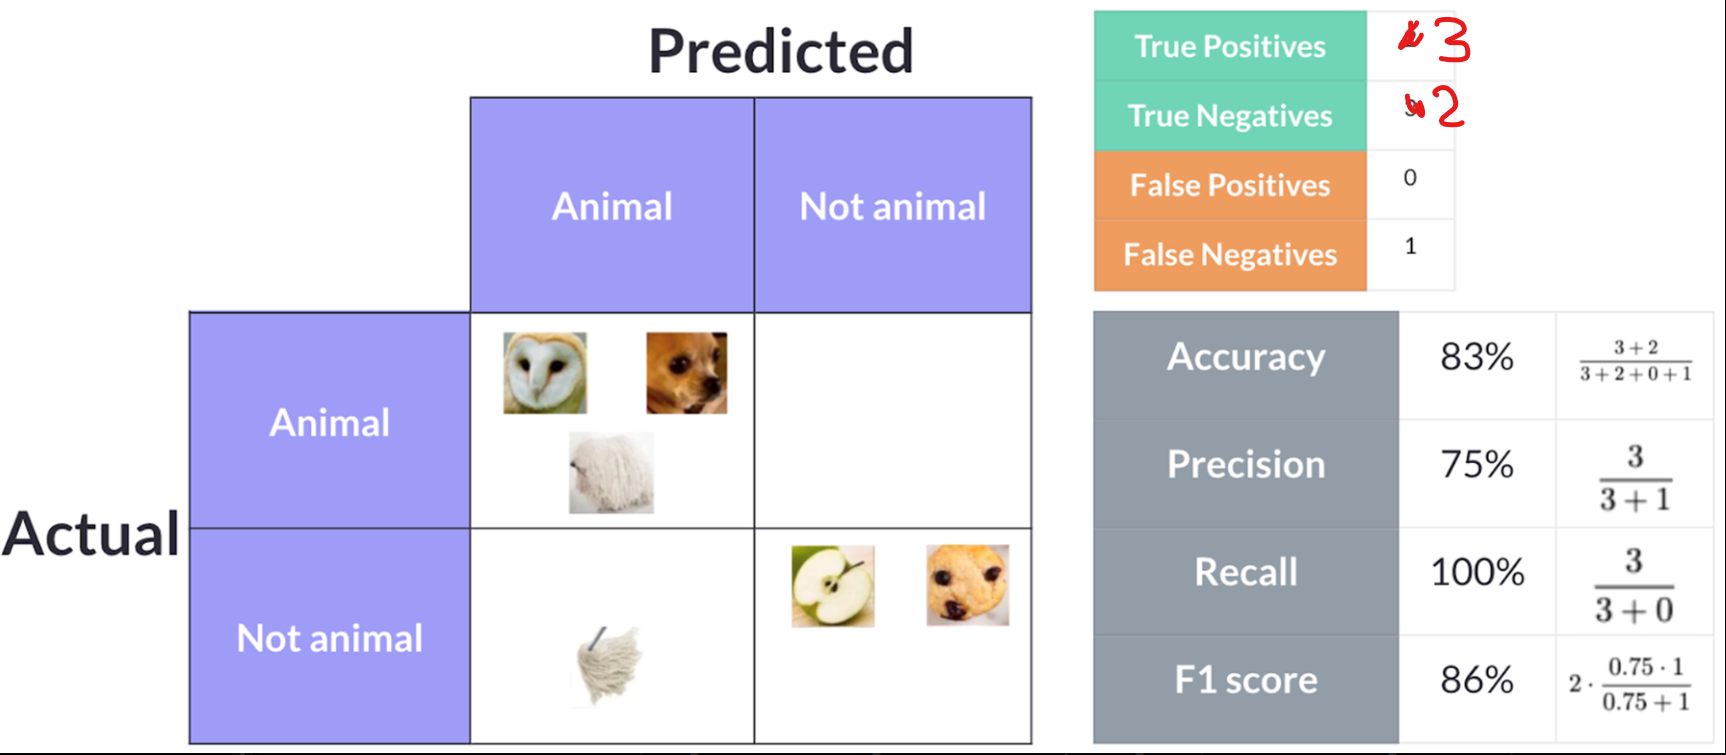
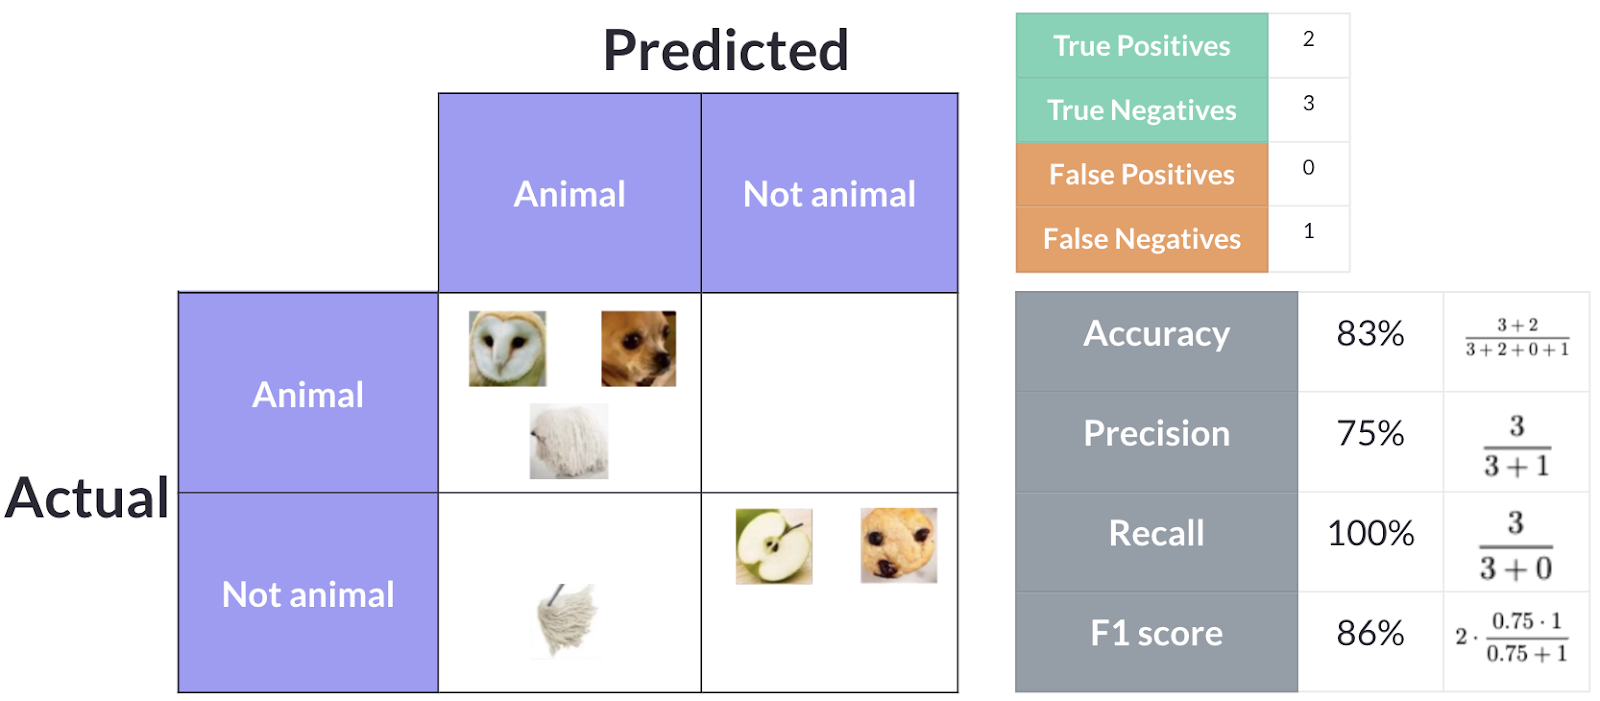

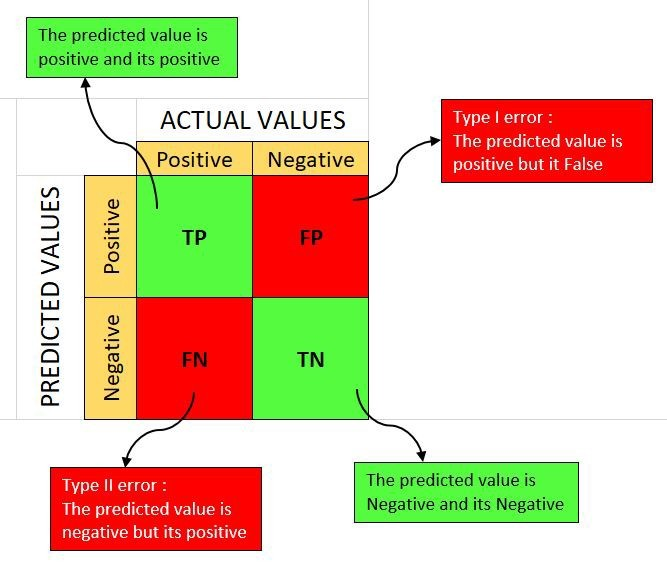

![img](https://miro.medium.com/v2/resize:fit:970/1*XbE6Fx9P9Q0w5QG-52BaRQ.png)

![img](https://www.researchgate.net/publication/367393140/figure/fig4/AS:11431281114710300@1674648981676/Confusion-matrix-Precision-Recall-Accuracy-and-F1-score.jpg)

Dưới đây là các công thức tính Precision, Recall, Accuracy và F1-Score dựa trên ảnh bạn đã cung cấp:

### Confusion Matrix (Ma Trận Nhầm Lẫn)

```
                  Predicted
                Positive  Negative
Actual Positive    TP         FN
       Negative    FP         TN
```


- **Precision**: Tỷ lệ các mẫu dương tính được dự đoán đúng trên tổng số mẫu được dự đoán là dương tính. Cao nghĩa là ít có các trường hợp FP.
- **Recall**: Tỷ lệ các mẫu dương tính được dự đoán đúng trên tổng số mẫu thực sự là dương tính. Cao nghĩa là ít có các trường hợp FN.
- **Accuracy**: Tỷ lệ các dự đoán đúng (cả dương tính và âm tính) trên tổng số mẫu.
- **F1-Score**: Trung bình điều hòa của Precision và Recall, cung cấp một chỉ số cân bằng giữa hai giá trị này, đặc biệt hữu ích khi có sự mất cân bằng giữa số lượng mẫu dương tính và âm tính.



### Tiêu chí đánh giá đơn giản

1. **Độ Chính xác (Accuracy)**:
   - **Ý nghĩa**: Cho biết mô hình đoán đúng bao nhiêu lần trong tổng số lần đoán.
   - **Ví dụ**: Nếu bạn làm 10 bài tập và làm đúng 8 bài, thì độ chính xác là 8/10 = 80%.

2. **Độ Chính xác tích cực (Precision)**:
   - **Ý nghĩa**: Cho biết khi mô hình đoán một thứ là đúng, thì có bao nhiêu lần nó thực sự đúng.
   - **Ví dụ**: Nếu bạn đoán có 10 quả táo, nhưng chỉ có 7 quả thực sự là táo, thì độ chính xác tích cực là 7/10 = 70%.

3. **Độ Nhạy (Recall)**:
   - **Ý nghĩa**: Cho biết mô hình có tìm ra tất cả các thứ đúng không.
   - **Ví dụ**: Nếu trong 10 quả táo, bạn tìm ra 7 quả, thì độ nhạy là 7/10 = 70%.

4. **Điểm số F1 (F1 Score)**:
   - **Ý nghĩa**: Là sự kết hợp của Độ Chính xác tích cực và Độ Nhạy, để xem mô hình làm việc tốt như thế nào.
   - **Ví dụ**: Nếu cả độ chính xác tích cực và độ nhạy của bạn đều là 70%, thì điểm số F1 của bạn cũng sẽ là 70%.

### Ví dụ đơn giản

Giả sử bạn có 10 viên kẹo, trong đó có 4 viên màu đỏ và 6 viên màu xanh. Bạn đoán:

- 3 viên màu đỏ đúng (chính xác)
- 1 viên màu đỏ sai (không chính xác)
- 2 viên màu xanh mà bạn đoán là đỏ (không chính xác)
- 5 viên màu xanh đúng (chính xác)

Từ đó, ta tính các chỉ số:

- **Độ Chính xác**: (3 + 5) / 10 = 80%
- **Độ Chính xác tích cực**: 3 / (3 + 2) = 60%
- **Độ Nhạy**: 3 / (3 + 1) = 75%
- **Điểm số F1**: Sự kết hợp của 60% và 75%, khoảng 67.5%


- Tiêu chí đánh giá: 
  - Accuracy (Độ Chính xác): Tỉ lệ của tổng số mẫu được phân loại đúng so với tổng số mẫu.
  - Precision (Độ Chính xác tích cực): Tỉ lệ các mẫu dự đoán là tích cực chính xác.
  - Recall (Độ Nhạy): Tỉ lệ các mẫu thực sự tích cực được phân loại đúng.
  - F1 Score (Điểm số F1): Trung bình điều hòa của Precision và Recall.



Khi có hai lớp và dữ liệu mất cân bằng như trong hình ảnh bạn cung cấp, việc sử dụng chỉ số "accuracy" có thể không cung cấp một bức tranh chính xác về hiệu suất mô hình, vì nó có thể bị thiên vị bởi lớp đa số. Các chỉ số sau đây thường được sử dụng để đánh giá mô hình trong trường hợp này:

1. **F1-Score**: Là chỉ số phổ biến để đánh giá mô hình trên dữ liệu mất cân bằng vì nó cân nhắc giữa precision và recall, đặc biệt là khi một sự cân bằng giữa chúng là quan trọng.

2. **Precision và Recall**: Xem xét cả hai chỉ số này riêng biệt có thể cung cấp thông tin chi tiết hơn về việc mô hình của bạn có xu hướng phân loại như thế nào - liệu nó có thiên vị về việc tránh dự đoán sai lớp thiểu số (precision cao) hay cố gắng bắt tất cả mẫu lớp thiểu số (recall cao).

3. **Balanced Accuracy**: Đo lường trung bình của tỉ lệ đúng giữa cả hai lớp, đảm bảo rằng cả lớp thiểu số và lớp đa số đều được xem xét.

4. **Matthews Correlation Coefficient (MCC)**: Đây là một chỉ số khác có thể hữu ích khi đánh giá hiệu suất của các mô hình trên dữ liệu mất cân bằng, vì nó cung cấp một số đo hiệu suất tổng quát dựa trên tất cả bốn phần của ma trận nhầm lẫn.

5. **ROC AUC**: Tính diện tích dưới đường cong ROC (Receiver Operating Characteristic) là một cách tốt để đánh giá mô hình khi tất cả các lớp đều quan trọng như nhau, và không quan tâm nhiều đến mức độ mất cân bằng giữa chúng.

6. **Precision-Recall AUC**: Đây là một chỉ số quan trọng trong trường hợp lớp thiểu số là lớp quan trọng và bạn muốn đảm bảo rằng mô hình không chỉ đơn giản là dự đoán lớp đa số.

SVM trước Tuning có F1 Score: 0.4502,
Sau 100 lần study best F1 Score =

ROC AUC (Receiver Operating Characteristic - Area Under Curve) đo lường khả năng phân biệt của mô hình giữa các lớp dựa trên tỷ lệ giữa tỷ lệ dương tính thực sự (True Positive Rate - TPR) và tỷ lệ dương tính giả (False Positive Rate - FPR) tại mọi ngưỡng phân loại.

Để tính ROC AUC:

1. **Tính TPR và FPR**: Với một loạt các ngưỡng, tính TPR (còn gọi là recall hoặc sensitivity) và FPR (1 - specificity).
   - **TPR** = TP / (TP + FN)
   - **FPR** = FP / (FP + TN)

   Trong đó:
   - TP là số lượng dự đoán đúng là positive (true positive).
   - FN là số lượng dự đoán sai là negative (false negative).
   - FP là số lượng dự đoán sai là positive (false positive).
   - TN là số lượng dự đoán đúng là negative (true negative).

2. **Vẽ đường cong ROC**: Vẽ một đường cong với FPR trên trục hoành và TPR trên trục tung.

3. **Tính diện tích dưới đường cong (AUC)**: Diện tích dưới đường cong ROC là một số đo của hiệu suất tổng thể của mô hình; giá trị AUC càng cao, khả năng phân biệt giữa các lớp càng tốt.


## Kết luận:


Việc áp dụng SMOTE để cân bằng dữ liệu và sử dụng Optuna để tối ưu siêu tham số đã cải thiện hiệu suất mô hình SVM đáng kể. 
Mô hình sau tuning phân loại tốt hơn cả các mẫu lỗi và không lỗi, nâng cao độ chính xác tổng thể. 

=> Điều này khẳng định tầm quan trọng của cân bằng dữ liệu và tối ưu hóa siêu tham số trong phát triển mô hình học máy hiệu quả cho phân loại lỗi phần mềm. 



## hướng phsat triển


Tích hợp thêm yếu tố và nguồn dữ liệu đa dạng.
Khám phá các kỹ thuật học máy mới và tiên tiến.
Tối ưu hóa và cập nhật mô hình dựa trên phản hồi thực tế.
Phát triển giao diện người dùng trực quan.


4.7 Hướng phát triển
Hiệu suất mô hình hiện tại chưa cao, đặc biệt khi dự đoán các mẫu sản phẩm lỗi. Để cải thiện, em dự kiến 1 số hướng phát triển trong tương lai: 
 4.7.1 Tích hợp thêm yếu tố và nguồn dữ liệu đa dạng
- Thu thập dữ liệu phong phú: Từ các hệ thống và môi trường phần mềm khác nhau.
- Phân tích tương quan: Xác định mối liên hệ giữa lỗi phần mềm và các yếu tố khác như thời gian, loại ứng dụng.
4.7.2 Khám phá các kỹ thuật học máy mới và tiên tiến
- Khám phá phương pháp học máy tiên tiến: Như học tăng cường và học chuyển giao.
 4.7.3 Tối ưu hóa và cập nhật mô hình dựa trên phản hồi thực tế
- Cập nhật mô hình: Học hỏi từ dữ liệu mới.
- Tối ưu tham số: Dựa trên hiệu suất thực tế để giảm báo động giả.
4.7.4 Phát triển giao diện người dùng trực quan: 
- Thiết kế giao diện: Đơn giản, dễ sử dụng nhưng hiệu quả. 
- Tối ưu trải nghiệm người dùng: Tích hợp tính năng dự đoán và cảnh báo tự động.

Mục tiêu là xây dựng hệ thống phân loại lỗi phần mềm mạnh mẽ, nâng cao chất lượng và khả năng dự đoán trong kỷ nguyên kỹ thuật số. 


HỎI: 

Hỏi: Mục đích của mô hình dự đoán lỗi sản phẩm. 
=> Mục đích thì như cái tên: tạo ra 1 mô hình dự đoán thôi. 

Hỏi: Đầu vào là gì, đầu ra là gì? 
- Training model thì ta lấy dữ liệu thầy cấp cho chia làm tập train và tập test (train để đào tạo, test để đánh giá hiệu suất sau quá trình đào tạo). 

Hỏi: Tại sao phải xử lý dữ liệu chuỗi. 
- Lúc train model thì mô hình chỉ hiểu được dữ liệu dạng số thôi, ko xử lý dữ liệu dạng chuỗi thì máy không hiểu được.